In [19]:
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from config import consumer_key,consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Setup Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Target Search Term
target_users = [
    "BBC",
    "CBS",
    "CNN",
    "FoxNews",
    "nytimes",
]

In [24]:
# List to hold results
sentiments = []
user_number = 0

# Loop through all target users
for user in target_users:
    counter = 1
    
    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add date, "tweets ago" (use counter), and sentiments for each tweet into a list
            sentiments.append({
                "User": user,
                "User Number": user_number,
                "Date": tweet["created_at"], 
                "Compound": compound,
                "Positive": pos,
                "Negative": neu,
                "Neutral": neg,
                "Tweets Ago": counter
            })
        
            # Add to counter 
            counter += 1
            
    user_number += 1

In [25]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User,User Number
0,0.8176,Sat Dec 01 20:03:09 +0000 2018,0.746,0.00,0.254,1,BBC,0
1,0.0000,Sat Dec 01 19:06:04 +0000 2018,1.000,0.00,0.000,2,BBC,0
2,0.0000,Sat Dec 01 17:54:03 +0000 2018,1.000,0.00,0.000,3,BBC,0
3,0.5848,Sat Dec 01 16:56:01 +0000 2018,0.704,0.00,0.296,4,BBC,0
4,-0.6249,Sat Dec 01 16:10:06 +0000 2018,0.830,0.17,0.000,5,BBC,0


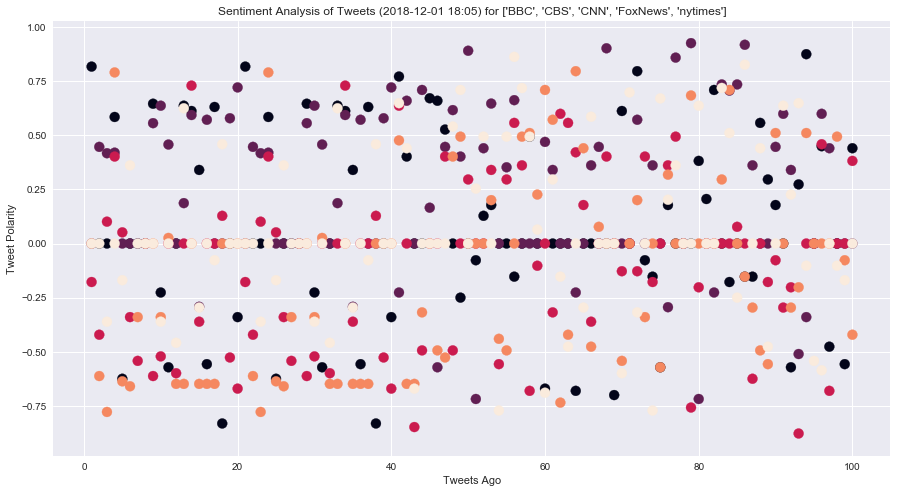

In [47]:
# Create plot for tweets ago vs compound sentiment score
sns.set()
#sentiments_pd.plot.scatter(
#    x="Tweets Ago",
#    y="Compound",
#    c="User"
#)
plt.figure(figsize=(15,8))
plt.scatter(
    x=sentiments_pd["Tweets Ago"],
    y=sentiments_pd["Compound"], 
    c=sentiments_pd["User Number"],
    s=100,
)

# Incorporate the other graph properties
now = datetime.now().strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_users}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.savefig('sentimental-analysis-scatter.png')

In [42]:
group_by_df = sentiments_pd.groupby('User')
group_by_df['Compound'].mean()

User
BBC        0.065935
CBS        0.238694
CNN       -0.076876
FoxNews   -0.116200
nytimes    0.056444
Name: Compound, dtype: float64

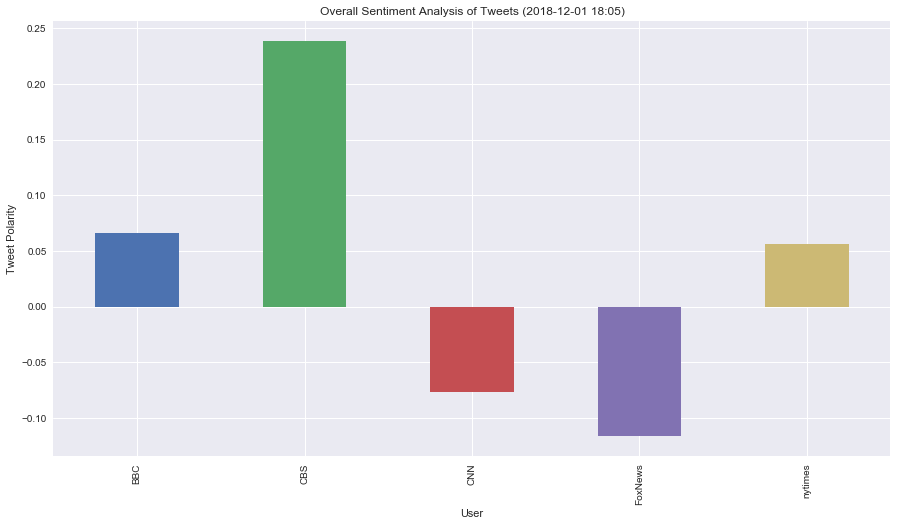

In [48]:
plt.figure(figsize=(15,8))
group_by_df['Compound'].mean().plot(kind='bar')
plt.title(f"Overall Sentiment Analysis of Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.savefig('overall-sentimental-analysis-bar.png')